In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import pulp as p
import random



In [2]:
# Get the Node Locations
location=pd.read_excel("DataFile.xlsx","Nodes",index_col=0)
Y=location.columns.values[0]
X=location.columns.values[1]
n_point=len(location)



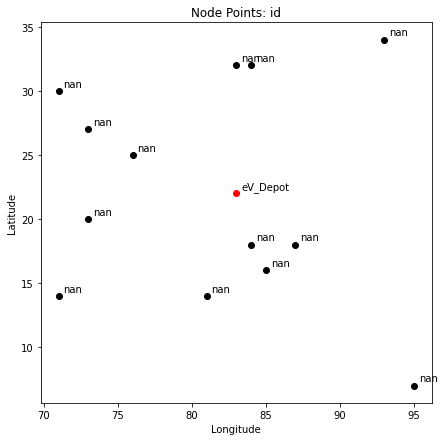

In [3]:
# Get the Distance Matrix
data=pd.read_excel("DataFile.xlsx","Distance Matrix",index_col=0)

# Random Start/End Point; here the Depot is assumed to be the first Node
vehicle_depot=0

# Check TSP state
plt.figure(figsize=(7,7))

# Draw the problem state
for i, row in location.iterrows():
    if i == vehicle_depot:
        plt.scatter(row[X], row[Y], c='r')
        plt.text(row[X] + 0.33, row[Y] + 0.33, 'eV_Depot')
    else:
        plt.scatter(row[X], row[Y], c='black')
        plt.text(row[X] + 0.33, row[Y] + 0.33, f'{i}')
plt.title('Node Points: id')
plt.xlabel(X)
plt.ylabel(Y)
plt.show()



In [8]:
# Set the problem
prob=p.LpProblem("MIP_TSP_Minimize_Small",p.LpMinimize)

# Set Variables
x=p.LpVariable.dicts('x',((i,j) for i in range(n_point) for j in range(n_point)),lowBound=0,upBound=1,cat='Binary')
#u=p.LpVariable.dicts('u',(i for i in range(n_point)),lowBound=1,upBound=n_point,cat='Integer')

# Set Objective Function
prob+=p.lpSum(data.iloc[i,j]*x[i,j] for i in range(n_point) for j in range(n_point))

# Set Constraints
for i in range(n_point):
    prob+=x[i,i]==0
    prob+=p.lpSum(x[i,j] for j in range(n_point))==1
    prob+=p.lpSum(x[j,i] for j in range(n_point))==1

#for i in range(n_point):
    #for j in range(n_point):
        #if i!=j and i!=vehicle_depot-1 and j!= vehicle_depot-1:
            #prob+=u[i]-u[j]+n_point*x[i,j]<=n_point-1
    
# Solve the problem
status=prob.solve()

# Output Status, Value of Objective Function
#status
p.LpStatus[status]
p.value(prob.objective)



91.69999999999997

x_(0,_13) = 1.0
x_(1,_12) = 1.0
x_(10,_11) = 1.0
x_(11,_10) = 1.0
x_(12,_1) = 1.0
x_(13,_0) = 1.0
x_(2,_5) = 1.0
x_(3,_2) = 1.0
x_(4,_6) = 1.0
x_(5,_3) = 1.0
x_(6,_9) = 1.0
x_(7,_8) = 1.0
x_(8,_7) = 1.0
x_(9,_4) = 1.0


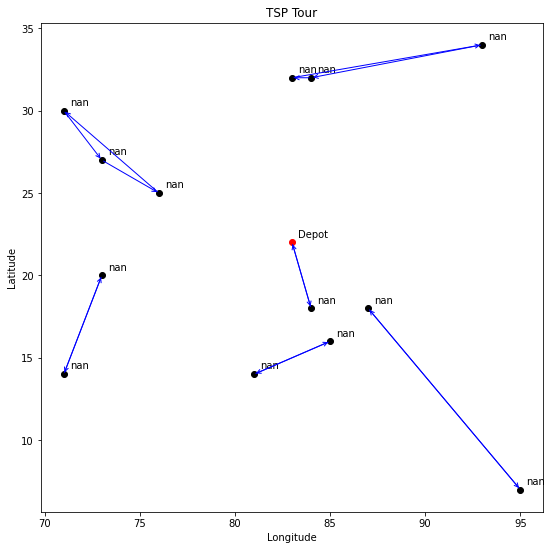

In [9]:
#Extracting the Final Path
for v in prob.variables():
    z=v.varValue
    if z==1:
        print(v.name, "=", v.varValue)
#These final value indexes of x are 1 less than the actual Node indexed values

#for i in range(n_point):
#    print(u[i].varValue)
# Minimum Objective Value:- 47.46374386

# Draw the optimal route
plt.figure(figsize=(9,9))

for i, row in location.iterrows():
    if i == vehicle_depot:
        plt.scatter(row[X], row[Y], c='r')
        plt.text(row[X] + 0.33, row[Y] + 0.33, 'Depot')
    else:
        plt.scatter(row[X], row[Y], c='black')
        plt.text(row[X] + 0.33, row[Y] + 0.33,f'{i}')
plt.title('TSP Tour')
plt.xlabel(X)
plt.ylabel(Y)

routes = [(i, j) for i in range(n_point) for j in range(n_point) if p.value(x[i, j]) == 1]
arrowprops = dict(arrowstyle='->', connectionstyle='arc3', edgecolor='blue')
for i, j in routes:
    plt.annotate('', xy=[location.iloc[j][X], location.iloc[j][Y]], xytext=[location.iloc[i][X], location.iloc[i][Y]], arrowprops=arrowprops)    
plt.show()